In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("iris.csv", header=None)

In [3]:
dataset.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
0    150 non-null float64
1    150 non-null float64
2    150 non-null float64
3    150 non-null float64
4    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
dataset[4].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: 4, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f85b73f1278>,
      dtype=object)

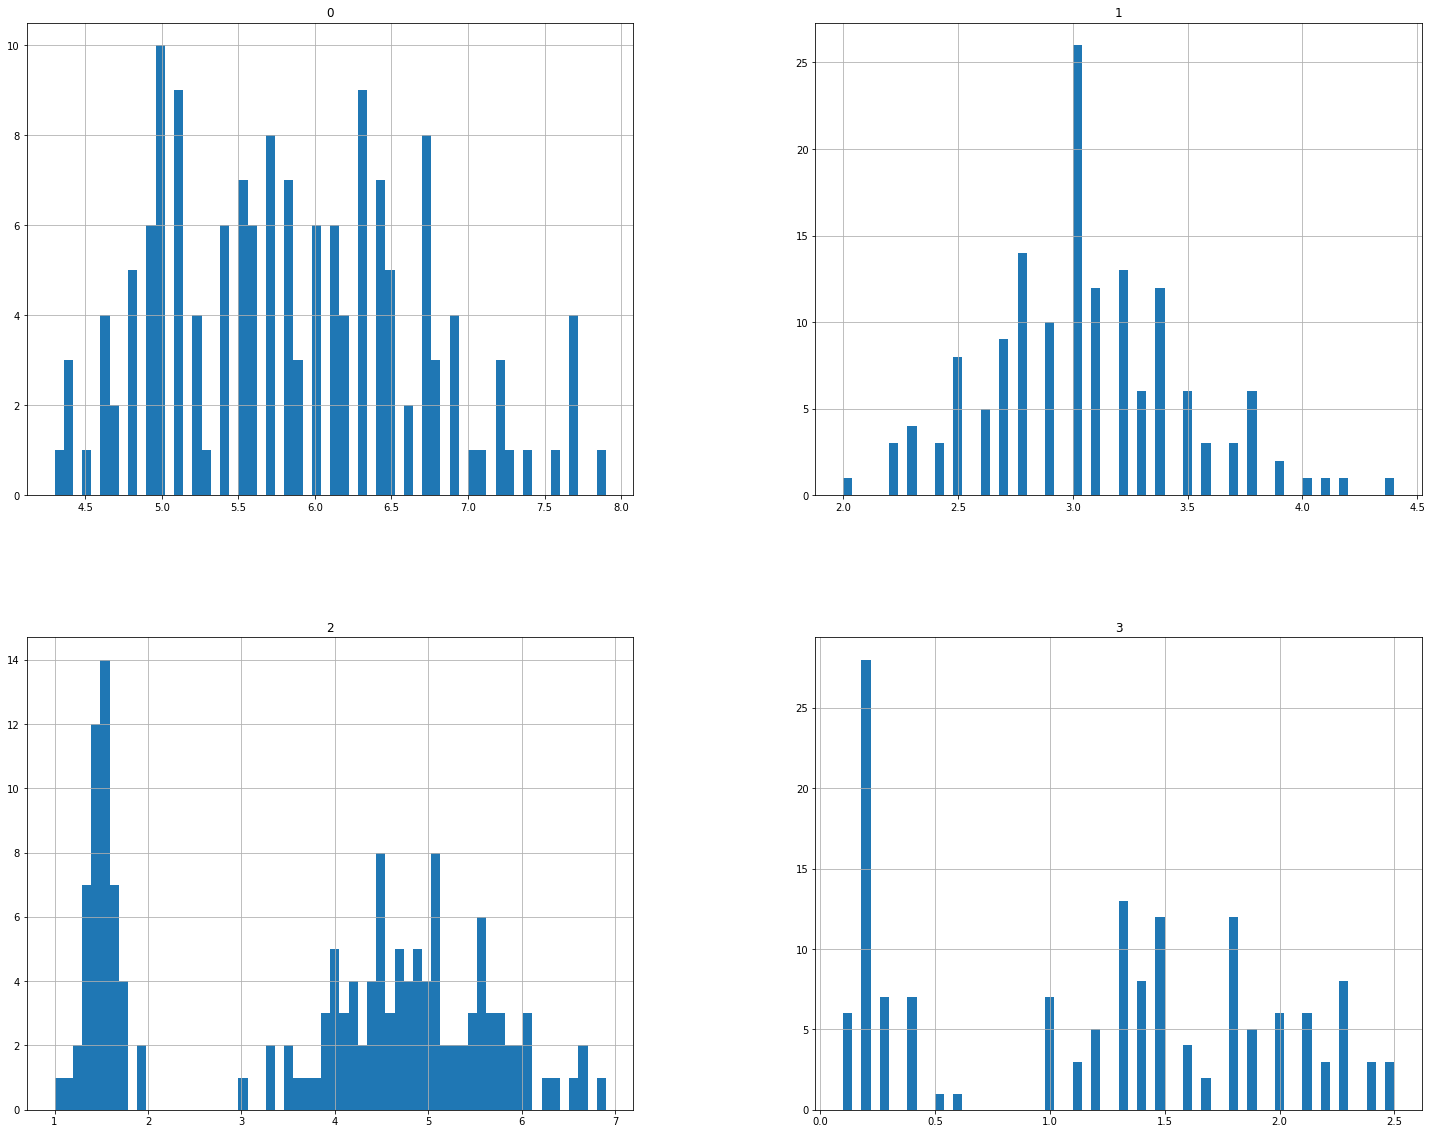

In [6]:
dataset.hist(bins=60, figsize=(25, 20))

In [7]:
dataset.corr()

,0,1,2,3
0,1.000000,-0.109369,0.871754,0.817954
1,-0.109369,1.000000,-0.420516,-0.356544
2,0.871754,-0.420516,1.000000,0.962757
3,0.817954,-0.356544,0.962757,1.000000


In [8]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
from sklearn.svm import SVC

svc_clf = SVC()

In [15]:
from sklearn.model_selection import GridSearchCV

grid_param = [
    {"C": [1, 3, 5, 7, 9], 
     "gamma": [0.1, 0.3, 0.5, 0.7, 0.9], 
     "kernel": ["rbf", "linear"]}
]

grid_search = GridSearchCV(svc_clf, grid_param, scoring="accuracy")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [1, 3, 5, 7, 9], 'gamma': [0.1, 0.3, 0.5, 0.7, 0.9], 'kernel': ['rbf', 'linear']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [16]:
print("Best parameters: {0}".format(grid_search.best_params_))
print("Best Accuracy: {0:.0f}%".format(100*grid_search.best_score_))

Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Best Accuracy: 96%


In [17]:
svc_clf = SVC(C=1, gamma=0.1, kernel="linear")

In [18]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svc_clf, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
scores = np.sqrt(-scores)

In [32]:
print("Mean: {0:.3f}".format(scores.mean()))
print("Std: {0:.3f}".format(scores.std()))

Mean: 0.109
Std: 0.170


In [19]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(svc_clf, X_train, y_train, cv=5)

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[40,  0,  0],
       [ 0, 37,  4],
       [ 0,  2, 37]])

In [33]:
from sklearn.metrics import f1_score

print("F1 score: {0:.3f}".format(f1_score(y_train, y_train_pred, average='macro')))

F1 score: 0.950


In [22]:
svc_clf.fit(X_train, y_train)
y_train_pred_test = svc_clf.predict(X_test)
confusion_matrix(y_test, y_train_pred_test)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

In [34]:
print("F1 score: {0:.3f}".format(f1_score(y_test, y_train_pred_test, average='macro')))

F1 score: 0.966


In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)

In [25]:
features = X[:, [0, 1, 3]]
y_kmeans = kmeans.fit_predict(features)

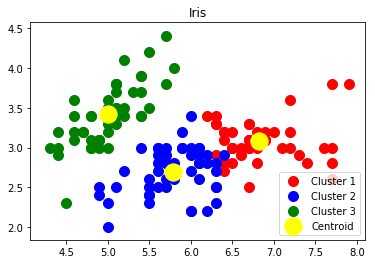

In [26]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroid')
plt.title("Iris")
plt.legend()
plt.show()